 Pandas allows various data manipulation operations such as merging, reshaping, selecting, as well as data cleaning, and data wrangling features.


NumPy contains a multi-dimensional array and matrix data structures. It can be utilised to perform a number of mathematical operations on arrays such as trigonometric, statistical, and algebraic routines

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
from scipy.stats import norm, skew 


pd.read_csv method creates dataframe from csv file

In [2]:
df1 = pd.read_csv('dataset.csv')

The head() function is used to get the first n rows. 

In [3]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The function "shape" returns the shape of an array. The shape is a tuple of integers.

In [4]:
df1.shape

(1460, 81)

columns attribute to return the column labels of the given dataframe.

In [5]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
It gives us more insight into the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]), <a list of 7 Text major ticklabel objects>)

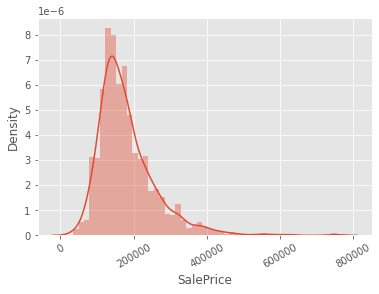

In [7]:
#Visualizing the distribution in the SalePrice feature using the sns.distplot() function in Seaborn:
sns.distplot(df1['SalePrice'])
plt.xticks(rotation = 30)
#We can see that the a lot of saleprices are clustered between the range 100000 and 200000.
#But due to some high sale prices the data is not centered around a point.
#We see that there is no symmetry present in the data and this asymmetry is called Skewness. 
#Here we can see that the graph is positively skewed. 


In [8]:
#We can also see the skewness in the data explicitly by using Dataframe.skew()
df1['SalePrice'].skew()
#Positive number tells us that it is positively skewed.

1.8828757597682129

Using heatmap to check correlation between the fields.

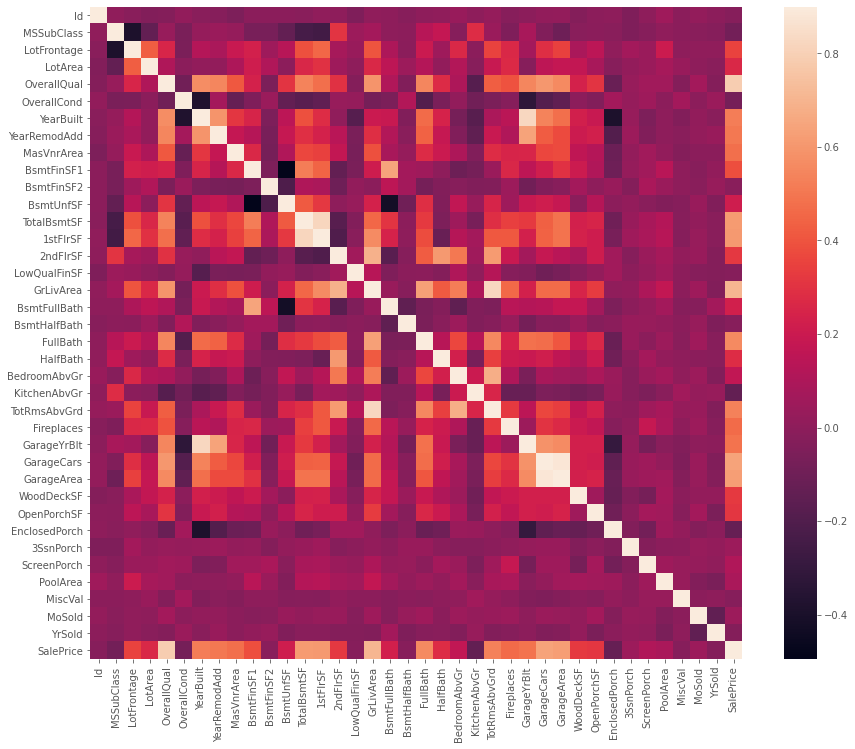

In [9]:
correlation = df1.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation, vmax = 0.9, square =True)
plt.show()

Few features that standout in this heatmap:

1.)1stFlrSF and TotalBsmtSF

2.)TotRmsAbvGrd and GrLivArea

3.)GarageYrBlt and YearBuilt

4.)GarageArea and GarageCars

5.)SalePrice and OverallQual

Plotting the above features to understand the relation between them:

1stFlrSF and TotalBsmtSF

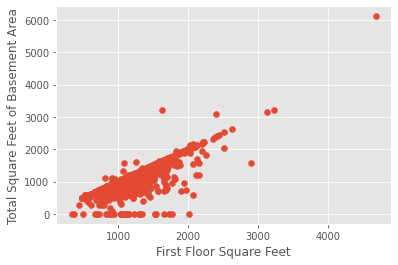

In [10]:
plt.scatter(x = df1['1stFlrSF'], y = df1['TotalBsmtSF'])
plt.xlabel('First Floor Square Feet')
plt.ylabel('Total Square Feet of Basement Area')
plt.show()

We can see that there is a linear relation between and most of the data point lie below that line. From this we infer that the basement area is either equal to or less than the area of first floor.

TotRmsAbvGrd and GrLivArea

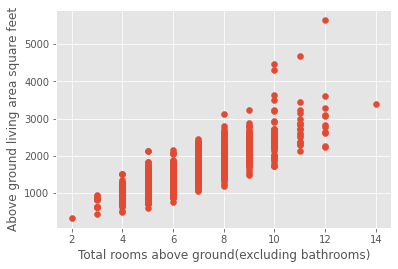

In [11]:
plt.scatter(x = df1['TotRmsAbvGrd'], y = df1['GrLivArea'])
plt.xlabel('Total rooms above ground(excluding bathrooms)')
plt.ylabel('Above ground living area square feet')
plt.show()

The number of total rooms increase as the above ground living area increases

GarageYrBuilt and YearBlt

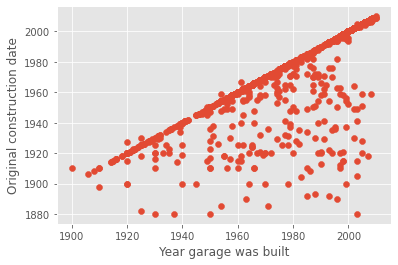

In [12]:
plt.scatter(x = df1['GarageYrBlt'], y = df1['YearBuilt'])
plt.xlabel('Year garage was built')
plt.ylabel('Original construction date')
plt.show()


We can see a linear relation between GarageYrBlt and YearBuilt and the majority of data points lies below the line. We can infer that the garages were either built along with the house or later on.

GarageArea and GarageCars

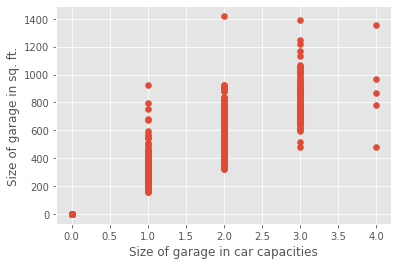

In [13]:
plt.scatter(x = df1['GarageCars'], y = df1['GarageArea'])
plt.xlabel('Size of garage in car capacities')
plt.ylabel('Size of garage in sq. ft.')
plt.show()


The number of cars that can fit in a garage would increase with its area. 



SalePrice and OverallQual

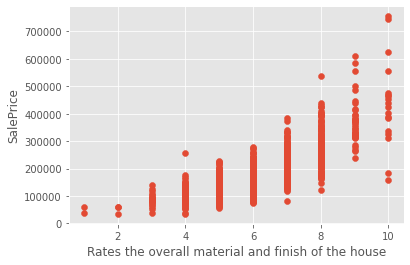

In [14]:
plt.scatter(x = df1['OverallQual'], y = df1['SalePrice'])
plt.xlabel('Rates the overall material and finish of the house')
plt.ylabel('SalePrice')
plt.show()

For high sale price of houses the Overall Qual is high. Very few houses have Overall Quality less than 4. A lot of houses lie between the range of 500000 and 300000. Majority of houses have Overall Quality in the range of 6 to 8.

select_dtypes() function return a subset of the DataFrame's columns based on the column dtypes. The parameters of this function can be set to include all the columns having some specific data type or it could be set to exclude all those columns which has some specific data types.

In [15]:
numeric_features = df1.select_dtypes(include=[np.number])
numeric_features.dtypes


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

The first 10 features are the most positively correlated with SalePrice, while the next 10 are the most negatively correlated.



In [16]:
#Correlation (or relationship) between the columns
corr = numeric_features.corr(method = 'pearson')
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]
print(corr_top,'\n')

print(corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [17]:
corr = numeric_features.corr(method = 'kendall')
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]
print(corr_top,'\n')

print(corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.669660
GarageCars      0.572168
GrLivArea       0.543942
FullBath        0.518693
GarageArea      0.478146
YearBuilt       0.470960
TotalBsmtSF     0.435018
GarageYrBlt     0.420842
YearRemodAdd    0.412955
Name: SalePrice, dtype: float64 

MSSubClass      -0.003979
BsmtHalfBath    -0.009962
Id              -0.012030
YrSold          -0.021796
BsmtFinSF2      -0.030710
MiscVal         -0.050917
LowQualFinSF    -0.055308
OverallCond     -0.103492
KitchenAbvGr    -0.134718
EnclosedPorch   -0.172094
Name: SalePrice, dtype: float64


Plotting the most correlated features with saleprice to understand the relation between them in a better way and also to see if outliers are present in these graphs or not.

In [18]:
corr = numeric_features.corr(method = 'spearman')
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]
print(corr_top,'\n')

print(corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice      1.000000
OverallQual    0.809829
GrLivArea      0.731310
GarageCars     0.690711
YearBuilt      0.652682
GarageArea     0.649379
FullBath       0.635957
TotalBsmtSF    0.602725
GarageYrBlt    0.593788
1stFlrSF       0.575408
Name: SalePrice, dtype: float64 

MSSubClass       0.007192
BsmtHalfBath    -0.012189
Id              -0.018546
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePrice, dtype: float64


Kendall’s Tau: usually smaller values than Spearman’s rho correlation. Calculations based on concordant and discordant pairs. Insensitive to error. P values are more accurate with smaller sample sizes.

Spearman’s rho: usually have larger values than Kendall’s Tau.  Calculations based on deviations.  Much more sensitive to error and discrepancies in data.

The main advantages of using Kendall’s tau are as follows:

The distribution of Kendall’s tau has better statistical properties.
The interpretation of Kendall’s tau in terms of the probabilities of observing the agreeable (concordant) and non-agreeable (discordant) pairs is very direct.
In most of the situations, the interpretations of Kendall’s tau and Spearman’s rank correlation coefficient are very similar and thus invariably lead to the same inferences.


From both Spearman and Kendall the feature with highest score is OverallQual.

GrLivArea and SalePrice

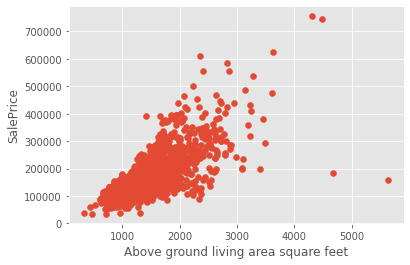

In [19]:
plt.scatter(x = df1['GrLivArea'], y = df1['SalePrice'])
plt.xlabel('Above ground living area square feet')
plt.ylabel('SalePrice')
plt.show()

GarageCars and SalePrice

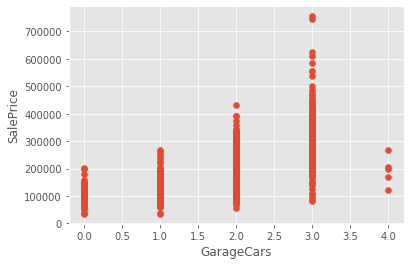

In [20]:
plt.scatter(x = df1['GarageCars'], y = df1['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

GaragArea and SalePrice

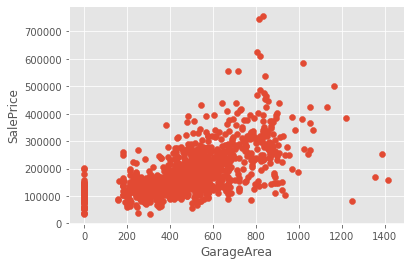

In [21]:
plt.scatter(x = df1['GarageArea'], y = df1['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

TotalBsmtSF and SalePrice

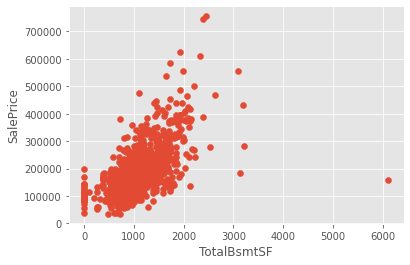

In [22]:
plt.scatter(x = df1['TotalBsmtSF'], y = df1['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

FullBath and SalePrice

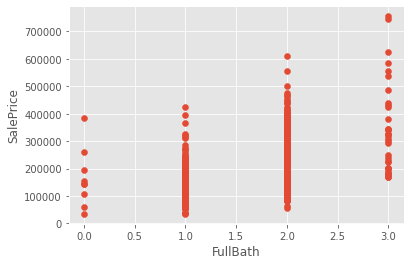

In [23]:
plt.scatter(x = df1['FullBath'], y = df1['SalePrice'])
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.show()

TotRmsAbvGrd and SalePrice

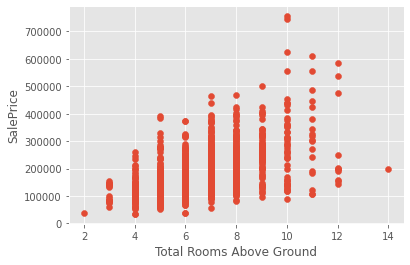

In [24]:
plt.scatter(x = df1['TotRmsAbvGrd'], y = df1['SalePrice'])
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('SalePrice')
plt.show()

YearBuilt and SalePrice

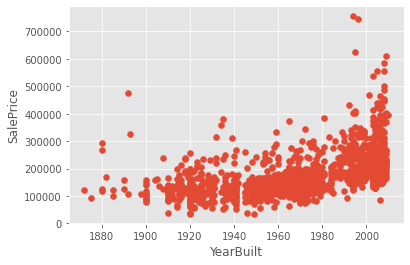

In [25]:
plt.scatter(x = df1['YearBuilt'], y = df1['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

We can see that outliers are present in the above graphs and we need to remove them as they interfere with the accuracy of preditions.

Some of the prominent outliers present in the above plotted graph:

1.)In TotalBsmtSF a data point on the right corner is present.

2.)Two points on the right side of the graph in GrLivArea.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


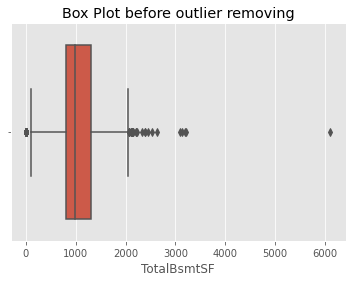

In [26]:
#We are using boxlots to see the outliers in each feature more clearly
sns.boxplot(df1['TotalBsmtSF'])
plt.title("Box Plot before outlier removing")
plt.show()

#Outliers are important because they are numbers that are "outside" of the Box Plot's upper and lower fence, though they don't affect or change any other numbers in the Box Plot your instructor will still want you to find them.

#If we want to find the fences we will first take the IQR and multiply it by 1.5. Let us call this magic number.

#Lower fence: Take Q1 and subtract it from magic number, that number we get is lower fence.

#Upper fence: Take Q3 and add it to magic number, that number you get is upper fence.

#Remember, any numbers that are "outside" the lower or upper fences is considered an outlier.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


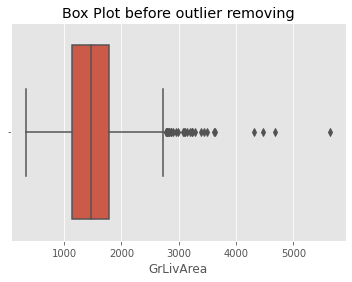

In [27]:
sns.boxplot(df1['GrLivArea'])
plt.title("Box Plot before outlier removing")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


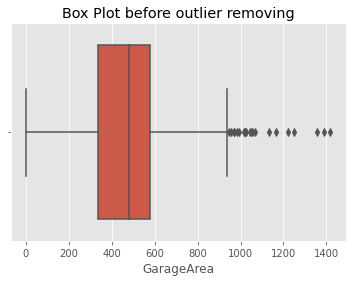

In [28]:

sns.boxplot(df1['GarageArea'])
plt.title("Box Plot before outlier removing")
plt.show()

Handling Outliers

In [29]:
Q1 = []
Q3 = []
Lower_bound = []
Upper_bound = []
Outliers = []




for i in top_features:
    
    # 25th and 75th percentiles
    q1, q3 = np.percentile(df1[i],25), np.percentile(df1[i],75)
    # Interquartile range
    iqr = q3 - q1
    # Outlier cutoff
    cut_off = 1.5*iqr
    # Lower and Upper bounds
    lower_bound = q1-cut_off
    upper_bound = q3+cut_off
        
    # save outlier indexes
    outlier = [x for x in df1.index if df1.loc[x,i]<lower_bound or df1.loc[x,i]>upper_bound]
    
    # append values for DataFrame
    Q1.append(q1)
    Q3.append(q3)
    Lower_bound.append(lower_bound)
    Upper_bound.append(upper_bound)
    Outliers.append(len(outlier))
    
    try:
        df1.drop(outlier,inplace=True,axis=0)
    except:
        continue


df_out = pd.DataFrame({'Column':top_features,'Q1':Q1,'Q3':Q3,'Lower bound':Lower_bound,'Upper_bound':Upper_bound,'No. of outliers':Outliers})    
df_out.sort_values(by='No. of outliers',ascending=False)


,Column,Q1,Q3,Lower bound,Upper_bound,No. of outliers
6,TotalBsmtSF,793.0,1267.50,81.250,1979.250,58
1,GrLivArea,1131.0,1778.25,160.125,2749.125,31
4,GarageArea,327.0,576.00,-46.500,949.500,14
8,1stFlrSF,866.0,1344.00,149.000,2061.000,7
2,GarageCars,1.0,2.00,-0.500,3.500,5
3,YearBuilt,1954.0,2000.75,1883.875,2070.875,5
0,OverallQual,5.0,7.00,2.000,10.000,2
5,FullBath,1.0,2.00,-0.500,3.500,0
7,GarageYrBlt,NaN,NaN,NaN,NaN,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


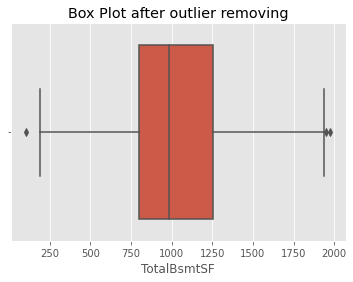

In [30]:
sns.boxplot(df1['TotalBsmtSF'])
plt.title("Box Plot after outlier removing")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


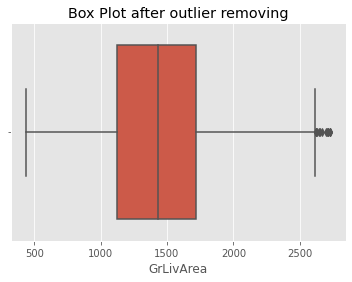

In [31]:
sns.boxplot(df1['GrLivArea'])
plt.title("Box Plot after outlier removing")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


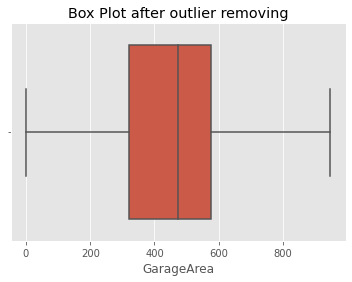

In [32]:

sns.boxplot(df1['GarageArea'])
plt.title("Box Plot after outlier removing")
plt.show()
#No outliers present

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


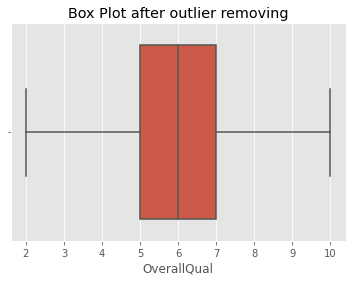

In [33]:
sns.boxplot(df1['OverallQual'])
plt.title("Box Plot after outlier removing")
plt.show()
#No outliers are present

In [34]:
df1.shape

(1338, 81)

We have dropped a few rows in order to avoid problem with predictions later.

Taking the log transformation of target feature using np.log() to deal with the skewness in the data


Skew is: -0.11142575081257262


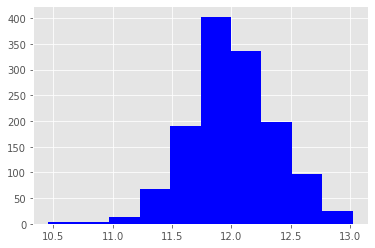

In [35]:
target = np.log(df1['SalePrice'])

print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5]),
 <a list of 8 Text major ticklabel objects>)

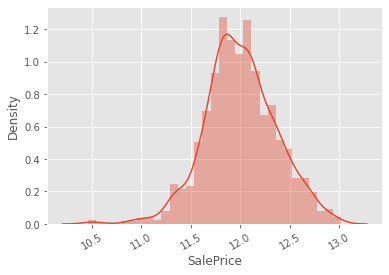

In [36]:
sns.distplot(target)
plt.xticks(rotation = 30)

The distributions now seems to be symmetrical and more normally distributed

Handling missing data

Number of missing values in each column 

In [37]:
df1.isna().sum().sort_values(ascending = False).head(20)

PoolQC          1335
MiscFeature     1290
Alley           1254
Fence           1075
FireplaceQu      649
LotFrontage      239
GarageQual        69
GarageCond        69
GarageYrBlt       69
GarageType        69
GarageFinish      69
MasVnrArea         6
MasVnrType         6
Electrical         1
BsmtExposure       1
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
ExterQual          0
dtype: int64

In [38]:
df1['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

In ordinal encoding, each unique category value is assigned an integer value. For example, “red” is 1, “green” is 2, and “blue” is 3. This is called an ordinal encoding or an integer encoding and is easily reversible. 



Ordinal Features

In [39]:
df1['PoolQC'].replace(['Ex','Gd','TA','Fa',np.nan],[4,3,2,1,0],inplace=True)

In [40]:
df1['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [41]:
df1['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw',np.nan],[4,3,2,1,0],inplace=True)


In [42]:
df1['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)


In [43]:
df1['GarageQual'].replace(['Ex','Gd','TA','Fa','Po',np.nan], [5,4,3,2,1,0], inplace = True)

In [44]:
df1['GarageCond'].replace(['Ex','Gd','TA','Fa','Po',np.nan], [5,4,3,2,1,0], inplace= True)

In [45]:
df1['GarageFinish'].replace(['Fin','RFn','Unf',np.nan],[3,2,1,0],inplace = True)

In [46]:
df1['BsmtExposure'].replace(['Gd','Av','Mn','No','NA',np.nan],[3,2,1,0,0,0], inplace = True)

Nominal Features

In [47]:
df1['MiscFeature'].fillna('None', inplace = True)
#replacing null values with None

In [48]:
df1['Alley'].fillna('None', inplace = True)

In [49]:
df1['GarageType'].fillna('None',inplace = True)

In [50]:
df1['GarageYrBlt'].fillna('None',inplace = True)

In [51]:
df1['MasVnrType'].fillna('None', inplace = True)

In [52]:
df1['Electrical'].fillna('None', inplace = True)

Numerical Features

In [53]:
df1['LotFrontage'] = df1.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
#replacing null values with the average of the neighborhood

In [54]:
df1['MasVnrArea'].fillna(0, inplace = True)

Feature Engineering

In [55]:
#Ordinal features
for i in ['BsmtCond','BsmtQual']:
    df1[i].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)

for i in ['BsmtFinType1','BsmtFinType2']:
    df1[i].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan],[6,5,4,3,2,1,0],inplace=True)     

#Numerical features
for i in ['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    df1[i].fillna(0,inplace=True)


In [56]:
#If no masonary work, then area is 0
df1['MasVnrArea'].fillna(0,inplace=True)

#Replacing with the most common value
for i in ['MSZoning','Utilities']:
    df1[i].fillna(df1[i].mode()[0],inplace=True)


#Assuming typical unless deductions are warranted
df1['Functional'].fillna('Typ',inplace=True)


#Replacing with others
df1['SaleType'].fillna('Oth',inplace=True)
#Replace with most common value
df1['Electrical'].fillna(df1['Electrical'].mode()[0],inplace=True)


#Replacing with 'Other' value
for i in ['Exterior1st','Exterior2nd']:
    df1[i].fillna('Other',inplace=True)
    
#Replacing with most common value
df1['KitchenQual'].fillna(df1['KitchenQual'].mode()[0],inplace=True)

#Ordinal value
df1['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)


In [57]:
#Ordinal features
df1['CentralAir'].replace(['N','Y'],[0,1],inplace=True)

#Nominal features
for i in ['HeatingQC','ExterCond','ExterQual']:
    df1[i].replace(['Ex','Gd','TA','Fa','Po'],[4,3,2,1,0],inplace=True)


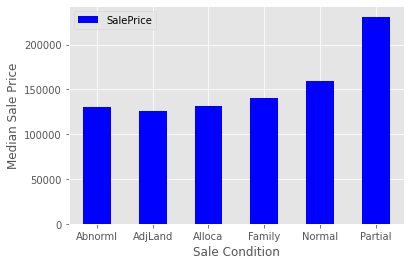

In [58]:
condition_pivot = df1.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.



In [59]:
# New house or an old house
df1['NewHouse'] = df1.apply(lambda x: 1 if x['SaleCondition']=='Partial' else 0, axis=1)
 


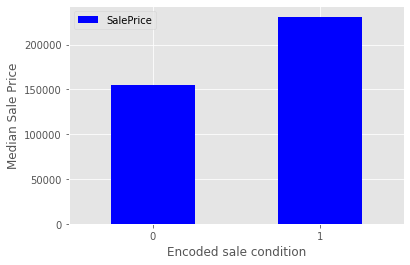

In [60]:
condition_pivot = df1.pivot_table(index='NewHouse', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded sale condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#linearity visible in the graph

In [61]:
# Total surface area of house
df1['TotalSF'] = df1.apply(lambda x: x['1stFlrSF'] + x['2ndFlrSF'] + x['TotalBsmtSF'], axis=1)

# Total number of bathrooms in the house
df1['TotalBath'] = df1.apply(lambda x: x['FullBath'] + 0.5*x['HalfBath'] + x['BsmtFullBath'] + 0.5*x['BsmtHalfBath'], axis=1)

# Total Porch area in the house
df1['TotalPorch'] = df1.apply(lambda x: x['OpenPorchSF'] + x['EnclosedPorch'] + x['3SsnPorch'] + x['ScreenPorch'], axis=1)



In [62]:
#Checking if the columns have null values
sum(df1.isnull().sum() != 0)


0

In [63]:
# One-Hot encoding
#To convert natural language into numerical value to feed the ML Model as it only understands numerical values
df1 = pd.get_dummies(df1,drop_first=True)
df1.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,...,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,3,2,4,3,0,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2,2,548,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,2,2,4,3,3,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,2,2,460,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,3,2,4,3,1,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,1,3,2,2,608,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,2,2,3,4,0,5,216,1,0,540,756,3,1,961,756,0,1717,1,0,1,0,3,1,3,7,1,4,1,3,642,3,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,3,2,4,3,2,6,655,1,0,490,1145,4,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,3,2,3,836,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


OverallQual is most closely related to SalePrice column

In [64]:
df1.OverallQual.unique()
#The OverallQual data are integer values in the interval 1 to 10 inclusive.


array([ 7,  6,  8,  5,  9,  4,  3, 10,  2])

Creating pivot table for better understanding

In [65]:
pivot = df1.pivot_table(index = 'OverallQual', values = 'SalePrice', aggfunc= np.median)
pivot

,SalePrice
OverallQual,
2,60000
3,85000
4,109008
5,133800
6,159250
7,199900
8,262250
9,328900
10,381750


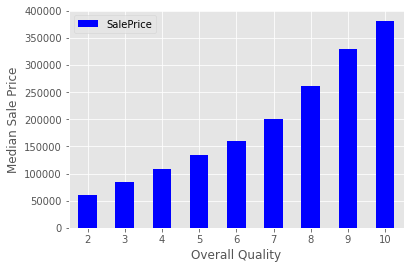

In [66]:
pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
# We see that the median sales price strictly increases as Overall Quality increases.

In [67]:
numeric_features = df1.select_dtypes(include=[np.number])
numeric_features.dtypes



Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 306, dtype: object

Pearson r correlation: Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables. For example, in the stock market, if we want to measure how two stocks are related to each other, Pearson r correlation is used to measure the degree of relationship between the two. The point-biserial correlation is conducted with the Pearson correlation formula except that one of the variables is dichotomous. The following formula is used to calculate the Pearson r correlation:



rxy = Pearson r correlation coefficient between x and y
n = number of observations
xi = value of x (for ith observation)
yi = value of y (for ith observation)

Assumptions

For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have a bell-shaped curve).  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the two variables and homoscedasticity assumes that data is equally distributed about the regression line.



In [68]:
corr = numeric_features.corr(method = 'pearson')
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]
print(corr_top,'\n')

print(corr['SalePrice'].sort_values(ascending=False)[-10:])
#pearson can't be used as the correlation method because it requires both variables to be normally distributed.

SalePrice      1.000000
TotalSF        0.805195
OverallQual    0.796055
GrLivArea      0.697444
ExterQual      0.685524
KitchenQual    0.663243
BsmtQual       0.661637
GarageCars     0.659490
TotalBath      0.632327
GarageArea     0.631676
Name: SalePrice, dtype: float64 

Exterior1st_Wd Sdng    -0.205346
SaleType_WD            -0.224656
Neighborhood_OldTown   -0.244686
GarageType_None        -0.254425
GarageYrBlt_None       -0.254425
LotShape_Reg           -0.279581
MSZoning_RM            -0.343316
Foundation_CBlock      -0.378772
GarageType_Detchd      -0.382228
MasVnrType_None        -0.383375
Name: SalePrice, dtype: float64


Kendall rank correlation: Kendall rank correlation is a non-parametric test that measures the strength of dependence between two variables.  If we consider two samples, a and b, where each sample size is n, we know that the total number of pairings with a b is n(n-1)/2.  The following formula is used to calculate the value of Kendall rank correlation:

kendall rank correlation
Nc= number of concordant
Nd= Number of discordant

What is concordance and disconcordance?

Used with ordinal ranking.

Measure of agreement between ranks.

Must be ordered and paired.

*Tie: ranks agree

*Concordant ranks: Number of ranks scored below a given rank- measure of agreement.

*Discordant ranks: Number of ranks scored above a rank - measure of disagreement.






In [69]:
corr = numeric_features.corr(method = 'kendall')
corr_top = corr['SalePrice'].sort_values(ascending=False)[:20]
top_features = corr_top.index[1:]
print(corr_top,'\n')

print(corr['SalePrice'].sort_values(ascending=False)[-10:])
#Kendall's tau is used in small samples or when we have many values with the same score.


SalePrice           1.000000
OverallQual         0.652222
TotalSF             0.614542
GarageCars          0.565236
ExterQual           0.553906
KitchenQual         0.543788
BsmtQual            0.543249
TotalBath           0.536098
GrLivArea           0.528111
FullBath            0.524421
GarageFinish        0.501729
YearBuilt           0.484008
Foundation_PConc    0.465260
GarageArea          0.459698
YearRemodAdd        0.411427
FireplaceQu         0.394524
TotalBsmtSF         0.390201
TotRmsAbvGrd        0.388337
1stFlrSF            0.388324
Fireplaces          0.385322
Name: SalePrice, dtype: float64 

Exterior1st_Wd Sdng    -0.182038
EnclosedPorch          -0.195499
Neighborhood_OldTown   -0.239703
GarageYrBlt_None       -0.241545
GarageType_None        -0.241545
LotShape_Reg           -0.259686
MasVnrType_None        -0.308942
Foundation_CBlock      -0.324552
MSZoning_RM            -0.337522
GarageType_Detchd      -0.361109
Name: SalePrice, dtype: float64


Spearman rank correlation: Spearman rank correlation is a non-parametric test that is used to measure the degree of association 

between two variables.  The Spearman rank correlation test does not carry any assumptions about the distribution of the data and 

is the appropriate correlation analysis when the variables are measured on a scale that is at least ordinal.

The following formula is used to calculate the Spearman rank correlation:

spearman rank correlation

ρ= Spearman rank correlation

di= the difference between the ranks of corresponding variables

n= number of observations


Assumptions

The assumptions of the Spearman correlation are that data must be at least ordinal and the scores on one variable must be 

monotonically related to the other variable.

What is monotonic?

Generally as X goes up, so does Y OR, as X goes up in values, Y goes down in value.

![image.png](attachment:image.png)



In [70]:
corr = numeric_features.corr(method = 'spearman')
corr_top = corr['SalePrice'].sort_values(ascending=False)[:20]
top_features = corr_top.index[1:]
print(corr_top,'\n')

print(corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice           1.000000
TotalSF             0.794382
OverallQual         0.792520
GrLivArea           0.714272
TotalBath           0.686227
GarageCars          0.683119
ExterQual           0.673895
YearBuilt           0.670623
KitchenQual         0.662577
BsmtQual            0.662007
FullBath            0.644147
GarageFinish        0.633807
GarageArea          0.626460
YearRemodAdd        0.569499
Foundation_PConc    0.568828
TotalBsmtSF         0.545644
1stFlrSF            0.544928
TotRmsAbvGrd        0.505419
FireplaceQu         0.500403
Fireplaces          0.484307
Name: SalePrice, dtype: float64 

Exterior1st_Wd Sdng    -0.222560
EnclosedPorch          -0.248449
Neighborhood_OldTown   -0.293061
GarageType_None        -0.295314
GarageYrBlt_None       -0.295314
LotShape_Reg           -0.317492
MasVnrType_None        -0.377713
Foundation_CBlock      -0.396798
MSZoning_RM            -0.412654
GarageType_Detchd      -0.441492
Name: SalePrice, dtype: float64


In [71]:
df1['OverallQual'].skew()
#skewness is near to zero.Therefore it is normally distributed.

0.18344720499443845

In [72]:
#According to me Spearman correlation is most most suitable way to check the correlation here becuase we have many features that have ordinal data.
#Even if the data is numeric, incase if spearman it will take their ranks and it will convert into ordinal data.

In [73]:
df1.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,...,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,3,2,4,3,0,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2,2,548,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,2,2,4,3,3,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,2,2,460,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [74]:
df1.shape

(1338, 306)

In [75]:
df1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=306)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

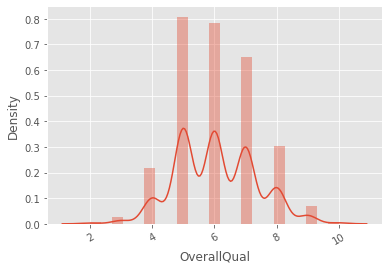

In [76]:
sns.distplot(df1['OverallQual'])
plt.xticks(rotation = 30)
#Skewness of OverallQual is near to zero

In [77]:
from sklearn.model_selection import train_test_split

X= df1
y = target

# training and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 48)


In [78]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

classifiers = [
    linear_model.BayesianRidge(),
    linear_model.Ridge(alpha =8) #chose 8 after trying various values randomly
    

]


for item in classifiers:
    print('\033[1m' ,item,'\n','\033[0m')
    clf = item
    clf.fit(X_train, y_train)
    print('Accuracy score is: \n',clf.score(X_test, y_test),'\n')
    print ('RMSE is: \n', mean_squared_error(y_test, clf.predict(X_test)),'\n')

    
    


 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 
 
Accuracy score is: 
 0.9584705154614657 

RMSE is: 
 0.00556352240779144 

 Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001) 
 
Accuracy score is: 
 0.9594985576723933 

RMSE is: 
 0.005425800113854845 



We can see that accuracy as well as RMSE of both the models are very close. 

 Ridge Regularization to decrease the influence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features.

We have many features in this dataset and not all of them are important features. Therefore we are using ridge regression.

In [79]:
from sklearn.linear_model import Ridge


In [80]:
model = Ridge(alpha =8)

In [81]:
model.fit(X_train,y_train)

Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [82]:
log_pred = model.predict(X_test)
actual_pred= np.exp(log_pred)

In [83]:
test_id = X_test['Id'] 

In [84]:
data_dict = {'Id':test_id,'SalePrice':actual_pred}


In [85]:
submit = pd.DataFrame(data_dict)
submit.to_csv('submission.csv',index=False)


In [86]:
predictions = model.predict(X_test)

he RMSE measures the distance between our predicted values and actual values.

The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

In [87]:
print ("R^2 is: \n", model.score(X_test, y_test))

#This means that our features explain approximately 96% of the variance in our target variable.

R^2 is: 
 0.9594985576723933


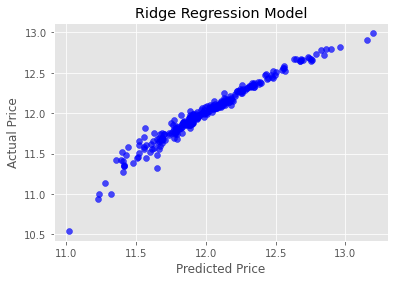

In [88]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Model')
plt.show()


We can see that the graph is very much linear.Therefore the actual price and predicted price are coinciding.

In [89]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [90]:
cv = LeaveOneOut()

In [91]:
from numpy import mean
from numpy import std


In [92]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force positive
scores = abs(scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 0.045 (0.053)


In [93]:
model.score(X_test,y_test)
#Accuracy Score

0.9594985576723933

In [94]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=306)

In [95]:
X.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,...,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,3,2,4,3,0,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2,2,548,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,2,2,4,3,3,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,2,2,460,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [96]:
X1 = X.drop(['Id',	'MSSubClass'	,'LotFrontage'	,'LotArea'	,'OverallCond'	,	'MasVnrArea',		'ExterCond',		'BsmtCond'	,'BsmtExposure'	,'BsmtFinType1'	,'BsmtFinSF1'	,'BsmtFinType2'	,'BsmtFinSF2'	,'BsmtUnfSF',	'HeatingQC',	'CentralAir','2ndFlrSF',	'LowQualFinSF',	'BsmtFullBath',	'BsmtHalfBath'	,'FullBath'	,'HalfBath',	'BedroomAbvGr',	'KitchenAbvGr',		'GarageYrBlt_1990.0',	'GarageYrBlt_1991.0',	'GarageYrBlt_1992.0',	'GarageYrBlt_1993.0',	'GarageYrBlt_1994.0',	'GarageYrBlt_1995.0',	'GarageYrBlt_1996.0',	'GarageYrBlt_1997.0','GarageYrBlt_1980.0', 'GarageYrBlt_1981.0', 'GarageYrBlt_1982.0',
       'GarageYrBlt_1970.0', 'GarageYrBlt_1971.0', 'GarageYrBlt_1972.0',
       'GarageYrBlt_1973.0', 'GarageYrBlt_1974.0', 'GarageYrBlt_1975.0',
       'GarageYrBlt_1976.0', 'GarageYrBlt_1977.0', 'GarageYrBlt_1978.0',
       'GarageYrBlt_1979.0',
       'GarageYrBlt_1950.0', 'GarageYrBlt_1951.0', 'GarageYrBlt_1952.0',
       'GarageYrBlt_1953.0', 'GarageYrBlt_1954.0', 'GarageYrBlt_1955.0',
       'GarageYrBlt_1956.0', 'GarageYrBlt_1957.0', 'GarageYrBlt_1958.0',
       'GarageYrBlt_1959.0',
       'GarageYrBlt_1938.0', 'GarageYrBlt_1939.0', 'GarageYrBlt_1940.0',
       'GarageYrBlt_1941.0', 'GarageYrBlt_1942.0', 'GarageYrBlt_1945.0',
       'GarageYrBlt_1946.0', 'GarageYrBlt_1947.0', 'GarageYrBlt_1948.0',
       'GarageYrBlt_1949.0',
       'GarageYrBlt_1960.0', 'GarageYrBlt_1961.0', 'GarageYrBlt_1962.0',
       'GarageYrBlt_1963.0', 'GarageYrBlt_1964.0', 'GarageYrBlt_1965.0',
       'GarageYrBlt_1966.0', 'GarageYrBlt_1967.0', 'GarageYrBlt_1968.0',
       'GarageYrBlt_1969.0',
       'GarageYrBlt_1928.0', 'GarageYrBlt_1929.0', 'GarageYrBlt_1930.0',
       'GarageYrBlt_1931.0', 'GarageYrBlt_1932.0', 'GarageYrBlt_1933.0',
       'GarageYrBlt_1934.0', 'GarageYrBlt_1935.0', 'GarageYrBlt_1936.0',
       'GarageYrBlt_1937.0',
       'GarageYrBlt_1916.0', 'GarageYrBlt_1918.0', 'GarageYrBlt_1920.0',
       'GarageYrBlt_1921.0', 'GarageYrBlt_1922.0', 'GarageYrBlt_1923.0',
       'GarageYrBlt_1924.0', 'GarageYrBlt_1925.0', 'GarageYrBlt_1926.0',
       'GarageYrBlt_1927.0',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_None', 'GarageYrBlt_1906.0',
       'GarageYrBlt_1908.0', 'GarageYrBlt_1910.0', 'GarageYrBlt_1914.0',
       'GarageYrBlt_1915.0',
       'Electrical_Mix', 'Electrical_None', 'Electrical_SBrkr',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'GarageType_Attchd',
       'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace',
       'MasVnrType_None',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc',
        'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'MasVnrType_Stone', 'Foundation_CBlock', 
       'Foundation_Stone', 'Foundation_Wood', 'Heating_GasW', 'Heating_Grav',
       'Heating_OthW', 'Electrical_FuseF', 'Electrical_FuseP',
       'GarageYrBlt_1983.0', 'GarageYrBlt_1984.0', 'GarageYrBlt_1985.0',
       'GarageYrBlt_1986.0', 'GarageYrBlt_1987.0', 'GarageYrBlt_1988.0',
       'GarageYrBlt_1989.0'	,'GarageYrBlt_1998.0',	'GarageYrBlt_1999.0',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_None', 'Alley_Pave', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable','SalePrice','PoolArea','WoodDeckSF',
       'GarageQual', 'GarageCond',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC',
       'Fence', 'MiscVal',
       	'GarageYrBlt_2000.0',	'GarageYrBlt_2001.0',	'GarageYrBlt_2002.0',	'GarageYrBlt_2003.0',	'GarageYrBlt_2004.0',	'GarageYrBlt_2005.0',	'GarageYrBlt_2006.0',	'GarageYrBlt_2007.0',	'GarageYrBlt_2008.0',	'GarageYrBlt_2009.0',	'GarageYrBlt_2010.0',	'GarageYrBlt_None',	'PavedDrive_P',	'PavedDrive_Y',	'MiscFeature_None',	'MiscFeature_Othr',	'MiscFeature_Shed',	'SaleType_CWD',	'SaleType_Con',
      	'SaleType_ConLD',	'SaleType_ConLI'	,'SaleType_ConLw',	'SaleType_New'	,'SaleType_Oth',	'SaleType_WD',	'SaleCondition_AdjLand',	'SaleCondition_Alloca',	'SaleCondition_Family',	'SaleCondition_Normal',	'SaleCondition_Partial'], axis =1)

In [97]:
X1.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'MoSold', 'YrSold', 'NewHouse', 'TotalSF', 'TotalBath', 'TotalPorch',
       'Foundation_PConc'],
      dtype='object')

In [98]:
# training and validation set
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=0.2,random_state = 48)


In [99]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

classifiers = [
    linear_model.BayesianRidge(),
    linear_model.Ridge(alpha =8) #chose 8 after trying various values randomly
    

]


for item in classifiers:
    print('\033[1m' ,item,'\n','\033[0m')
    clf = item
    clf.fit(X_train1, y_train1)
    print('Accuracy score is: \n',clf.score(X_test1, y_test1),'\n')
    print ('RMSE is: \n', mean_squared_error(y_test1, clf.predict(X_test1)),'\n')

    
    


 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 
 
Accuracy score is: 
 0.8292786263182158 

RMSE is: 
 0.022870791644096493 

 Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001) 
 
Accuracy score is: 
 0.8283815362171664 

RMSE is: 
 0.02299097085976592 



We would not take subset of the data as it leads to lesser accuracy score.